In [2]:
df = iris[,-5]
head(df)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4


In [3]:
train = df[1:100,]
test = df

In [4]:
km = kmeans(train, centers=3, iter.max=100)

In [5]:
mat = as.matrix(df)

# 각 cluster 별 데이터
d1 = mat[km$cluster==1,]
d2 = mat[km$cluster==2,]
d3 = mat[km$cluster==3,]

In [6]:
# 각 cluster 별 평균
c1_mean = apply(d1,2, mean)
c2_mean = apply(d2, 2, mean)
c3_mean = apply(d3, 2, mean)

In [7]:
# clutser_matrix
cluster = rbind(c1_mean, c2_mean, c3_mean)

cluster

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
c1_mean,5.955882,3.400000,3.517647,1.176471
c2_mean,5.936000,2.770000,4.260000,1.326000
c3_mean,5.715152,3.098485,3.501515,1.115152


In [8]:
train_dist = matrix(0,nrow(train),length(unique(km$cluster)))
for (j in 1:length(unique(km$cluster))){
  for(i in 1:nrow(train)){
    train_dist[i,j] = sqrt(sum((train[i,] - cluster[j,])^2))
  }
}

In [9]:
# min_dist의 cluster를 추출하겠다.
train_cluster = matrix(0, nrow(train), 1)
for (i in 1:nrow(train)){
  train_cluster[i,] = which(train_dist[i,] == min(train_dist[i,])) # row마다 min값의 위치 (cluster 번호)
}

In [10]:
train_result = cbind(train_dist, matrix(apply(train_dist,1, min)), train_cluster)

colnames(train_result) = c('cluster1', 'cluster2', 'cluster3', 'min_dist', 'cluster')

train_result = as.data.frame(train_result)
head(train_result)

cluster1,cluster2,cluster3,min_dist,cluster
2.486053,3.267916,2.406968,2.406968,3
2.590909,3.251718,2.434757,2.434757,3
2.736548,3.426671,2.593262,2.593262,3
2.636818,3.283180,2.467211,2.467211,3
2.528168,3.318504,2.452922,2.452922,3
2.113233,2.995876,2.121001,2.113233,1


In [11]:
# cluster의 boundary 정하기
library(dplyr)

boundary = train_result %>%
  group_by(cluster) %>%
  summarize(boundary = max(min_dist))

boundary = as.matrix(boundary)

boundary


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



cluster,boundary
1,2.590228
2,1.231289
3,2.968191


In [12]:
# test dist 구하기
test_dist = matrix(0,nrow(test),length(unique(km$cluster)))
for (j in 1:length(unique(km$cluster))){
  for(i in 1:nrow(test)){
    test_dist[i,j] = sqrt(sum((test[i,] - cluster[j,])^2))
  }
}

test_cluster = matrix(0, nrow(test), 1)
for (i in 1:nrow(test)){
  test_cluster[i,] = which(test_dist[i,] == min(test_dist[i,]))
}

test_result = cbind(test_dist, matrix(apply(test_dist,1, min)), test_cluster)
colnames(test_result) = c('cluster1', 'cluster2', 'cluster3', 'min_dist', 'cluster')
test_result = as.data.frame(test_result)

head(test_result)

cluster1,cluster2,cluster3,min_dist,cluster
2.486053,3.267916,2.406968,2.406968,3
2.590909,3.251718,2.434757,2.434757,3
2.736548,3.426671,2.593262,2.593262,3
2.636818,3.283180,2.467211,2.467211,3
2.528168,3.318504,2.452922,2.452922,3
2.113233,2.995876,2.121001,2.113233,1


In [14]:
outlier =  matrix(0, nrow(test_result), 1)

c1_outlier = as.matrix(ifelse(test_result[test_result$cluster==1, 4] > boundary[1,2], 1, 0))
c2_outlier = as.matrix(ifelse(test_result[test_result$cluster==2, 4] > boundary[2,2], 1, 0))
c3_outlier =as.matrix(ifelse(test_result[test_result$cluster==3, 4] > boundary[3,2], 1, 0))

outlier = rbind(c1_outlier, c2_outlier, c3_outlier)

result = cbind(test_result, outlier)  

head(result)

cluster1,cluster2,cluster3,min_dist,cluster,outlier
2.486053,3.267916,2.406968,2.406968,3,0
2.590909,3.251718,2.434757,2.434757,3,0
2.736548,3.426671,2.593262,2.593262,3,0
2.636818,3.283180,2.467211,2.467211,3,0
2.528168,3.318504,2.452922,2.452922,3,0
2.113233,2.995876,2.121001,2.113233,1,0


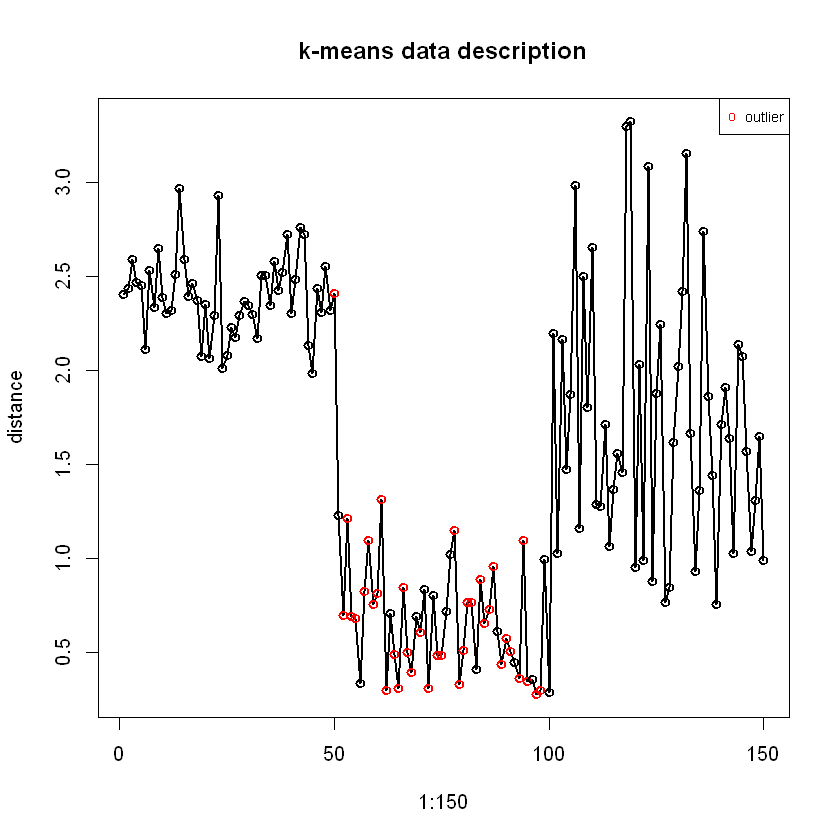

In [15]:
plot(1:150, result$min_dist, type='o', ylab = 'distance', main='k-means data description', lwd=2, col = result$outlier+1)

legend('topright', legend='outlier', pch='o', col='red', box.lty=1, cex=.7)